# Alejandro Builes

## Research question/interests

This notebook is focused on the relationship between Major categories and earnings(using P25th, Median and P75th), without leaving aside important variables such as: gender and employment/unemployment rate. This variables are being analyzed in notebooks analysis 1 and 3.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/alejandrobuiles/Documents/data301/project-group02-project/data/raw/recent-grads.csv")
data

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [6]:
data.shape

(173, 21)

In [7]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
ShareWomen,172.0,0.522223,0.231205,0.0,0.336026,0.534024,0.703299,0.968954
Unemployment_rate,173.0,0.068191,0.030331,0.0,0.050306,0.067961,0.087557,0.177226


In [8]:
data.describe(include='object').T

,count,unique,top,freq
Major,173,173,PETROLEUM ENGINEERING,1
Major_category,173,16,Engineering,29


In [7]:
data.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [9]:
data.nunique() #Unique values of each column

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   171
Major_category           16
ShareWomen              172
Sample_size             147
Employed                171
Full_time               173
Part_time               170
Full_time_year_round    173
Unemployed              161
Unemployment_rate       169
Median                   59
P25th                    48
P75th                    54
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           166
dtype: int64

In [10]:
data['Major_category'].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Agriculture & Natural Resources',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Humanities & Liberal Arts', 'Psychology & Social Work',
       'Communications & Journalism', 'Interdisciplinary'], dtype=object)

## Cleaning the data base

In [11]:
data.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

Need to drop the columns with null values in Total, Men, Women and ShareWomen rows.

In [13]:
is_null = data.isnull() 
row_has_null = is_null.any(axis=1)
rows_with_null = data[row_has_null]
rows_with_null

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [14]:
df = data.drop(['Major_code', 'Sample_size', 'College_jobs', 'Non_college_jobs'], axis = 1)
df.head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Low_wage_jobs
0,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,193
1,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,50
2,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,0
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,0
4,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,972


In [15]:
clean_data = df.drop([21]) #Column with null values dropped 
clean_data.isnull().sum()

Rank                    0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
Low_wage_jobs           0
dtype: int64

## Method chaining

In [3]:
import project_functions2 as p2

In [4]:
p2.clean_data(data)

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Low_wage_jobs
0,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,1976,1849,270,1207,37,0.018381,110000,95000,125000,193
1,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,640,556,170,388,85,0.117241,75000,55000,90000,50
2,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,648,558,133,340,16,0.024096,73000,50000,105000,0
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,758,1069,150,692,40,0.050125,70000,43000,80000,0
4,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,6259,5043,2190,3602,304,0.046320,26000,20000,39000,743
169,170,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,2125,1848,572,1211,148,0.065112,25000,24000,34000,82
170,171,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,2101,1724,648,1293,368,0.149048,25000,25000,40000,622
171,172,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,3777,3154,965,2738,214,0.053621,23400,19200,26000,308


In [5]:
p2.group_data_by_major_category(p2.clean_data(data))

,Major_category,Rank,Total,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Low_wage_jobs
0,Agriculture & Natural Resources,993,75620.0,40357.0,35263.0,0.466318,63794,55585,15470,41891,3486,0.046099,316000,222000,410100,7414
1,Arts,1049,357130.0,134390.0,222740.0,0.623694,288114,207773,114791,153111,28228,0.079041,264500,175700,349300,60116
2,Biology & Life Science,1335,453862.0,184919.0,268943.0,0.592566,302797,240377,116736,165802,22854,0.050355,509900,372600,645200,42742
3,Business,726,1302376.0,667852.0,634524.0,0.487205,1088742,988870,196936,790425,79877,0.061332,566000,435000,713000,126788
4,Communications & Journalism,416,392601.0,131921.0,260680.0,0.663982,330660,273330,89817,214228,26852,0.068395,138000,105000,179900,49595
5,Computers & Mathematics,627,299008.0,208725.0,90283.0,0.301942,237894,207545,53270,159156,18373,0.061447,470200,322200,639000,16136
6,Education,2086,559129.0,103526.0,455603.0,0.814844,479839,398059,120593,288031,24969,0.044657,517600,425450,617000,40870
7,Engineering,656,537583.0,408307.0,129276.0,0.240476,420372,381867,85136,288952,29817,0.055465,1664100,1205100,2043000,25079
8,Health,1158,463230.0,75517.0,387713.0,0.836977,372147,294819,114592,228418,22213,0.047952,441900,314000,603000,31270
9,Humanities & Liberal Arts,2026,713468.0,272846.0,440622.0,0.617578,544118,416939,214030,295561,51101,0.071623,478700,352400,631100,94240


## Data Analysis 
Function for P75th, Median and P25th mean by Major category 

Figure out which Major categories have the lower wage jobs, with graphs

In [15]:
print("Number of rows and columns respectively:", p2.clean_data(data).shape)
print("Columns in the dataset:", p2.clean_data(data).columns)

Number of rows and columns respectively: (172, 17)
Columns in the dataset: Index(['Rank', 'Major', 'Total', 'Men', 'Women', 'Major_category',
       'ShareWomen', 'Employed', 'Full_time', 'Part_time',
       'Full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median',
       'P25th', 'P75th', 'Low_wage_jobs'],
      dtype='object')


In [13]:
p2.clean_data(data).dtypes

Rank                      int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
Low_wage_jobs             int64
dtype: object

In [20]:
p2.clean_data(data).describe(include='int64').T 

,count,mean,std,min,25%,50%,75%,max
Rank,172.0,87.377907,49.983181,1.0,44.75,87.5,130.25,173.0
Employed,172.0,31355.808140,50777.428650,0.0,3734.75,12031.5,31701.25,307933.0
Full_time,172.0,26165.767442,42957.122320,111.0,3181.00,10073.5,25447.25,251540.0
Part_time,172.0,8877.232558,14679.038729,0.0,1013.75,3332.5,9981.00,115172.0
Full_time_year_round,172.0,19798.843023,33229.227514,111.0,2474.75,7436.5,17674.75,199897.0
Unemployed,172.0,2428.412791,4121.730452,0.0,299.50,905.0,2397.00,28169.0
Median,172.0,40076.744186,11461.388773,22000.0,33000.00,36000.0,45000.00,110000.0
P25th,172.0,29486.918605,9190.769927,18500.0,24000.00,27000.0,33250.00,95000.0
P75th,172.0,51386.627907,14882.278650,22000.0,41750.00,47000.0,58500.00,125000.0
Low_wage_jobs,172.0,3878.633721,6960.467621,0.0,336.75,1238.5,3496.00,48207.0


**Analysis**


* Taking into account the rank variable, it can be seen that the majors that are ranked between 1 and 44 are the majors with the best possible earnings in the sample as they are in the percentile 25. 
* On the other hand, the majors ranked between 131 and 175 are the majors with the lest possible earnings in the sample as they belong to the percentile 75.

In [21]:
p2.clean_data(data).describe(include='float64').T 

,count,mean,std,min,25%,50%,75%,max
Total,172.0,39370.081395,63483.491009,124.0,4549.750000,15104.000000,38909.750000,393735.000000
Men,172.0,16723.406977,28122.433474,119.0,2177.500000,5434.000000,14631.000000,173809.000000
Women,172.0,22646.674419,41057.330740,0.0,1778.250000,8386.500000,22553.750000,307087.000000
ShareWomen,172.0,0.522223,0.231205,0.0,0.336026,0.534024,0.703299,0.968954
Unemployment_rate,172.0,0.068024,0.030340,0.0,0.050261,0.067544,0.087247,0.177226


* The unemployment rate of the majors in the set is 6.8% with a standard deviation of 3%. Meaning that, the true value of the unemployment rate fluctuates between the 3.8% and 9.8%.

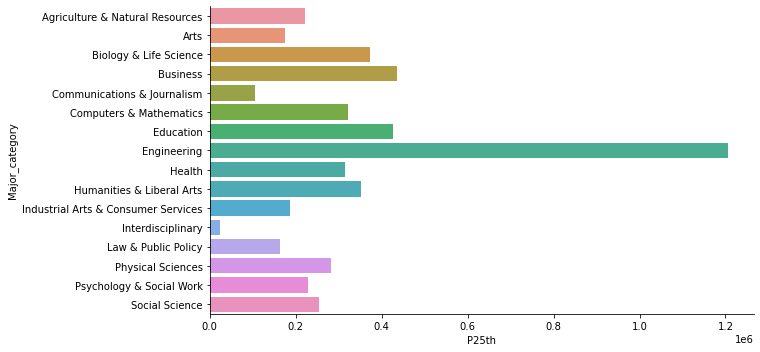

In [23]:
ax = sns.catplot(x="P25th",y="Major_category", data = p2.group_data_by_major_category(p2.clean_data(data)) , kind ="bar")
ax.fig.set_size_inches(20,5)
plt.show()

* The 25% percentile indicates the value that shows the 25% of the sample that earns the least. The fact that this value is relatively much higher than that of the other careers indicates that the 25% who earn the least in engineering, still earn much more than that same percentile of the other majors.

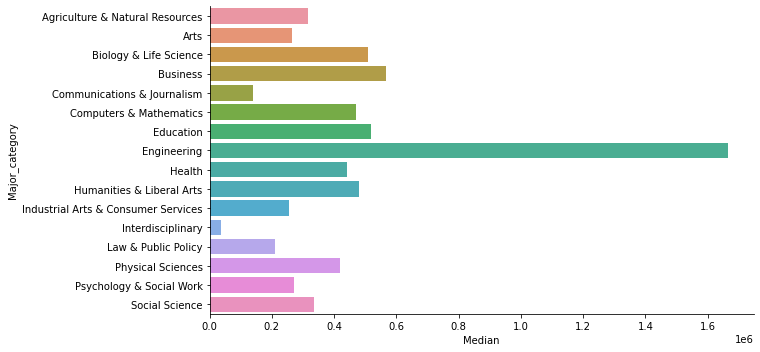

In [25]:
ax = sns.catplot(x="Median",y="Major_category", data = p2.group_data_by_major_category(p2.clean_data(data)), kind ="bar")
ax.fig.set_size_inches(20,5)
plt.show()

* The median graph still shows the enormous gap between engineering and the other majors in relation with the 50% of the sample. This shows how people that have higher salaries in other majors are not really competitive in relation with engineering earnings. Interdisciplinary majors are the most affected and most of the majors are 1/3 or more of the engineering earnings.

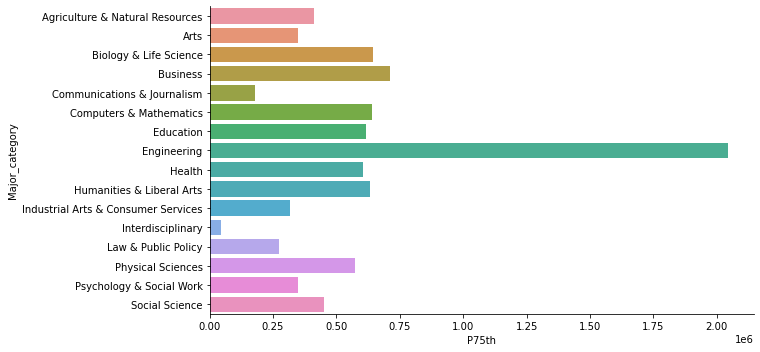

In [26]:
ax2 = sns.catplot(x="P75th",y="Major_category", data = p2.group_data_by_major_category(p2.clean_data(data)), kind ="bar")
ax2.fig.set_size_inches(20,5)
plt.show()

* As the 75th percentile shows the people that gains the most, the graph shows that engineering is the major with the highest wage. The people who gain the most in majors such as interdisciplinary, communications & journalism, earn very little with respect to majors such as: computer & mathematics, education, health, business, etc.

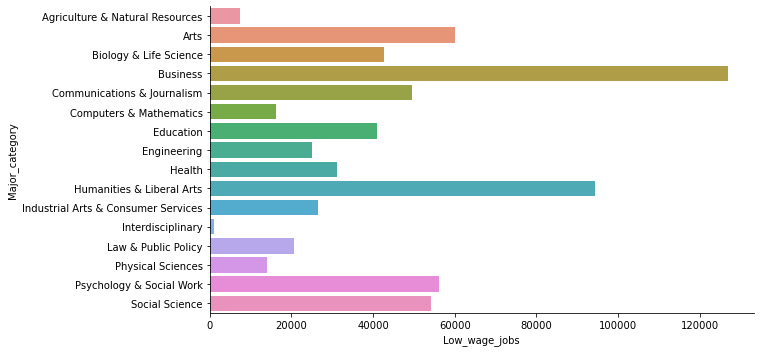

In [38]:
ax2 = sns.catplot(x="Low_wage_jobs",y="Major_category", data = p2.group_data_by_major_category(p2.clean_data(data)), kind ="bar")
ax2.fig.set_size_inches(20,5)
plt.show()

* The graph shows the relation between Major Category and Low Wage Jobs. From the graph it can be induced that the majors with more low wage jobs are business and humanities & liberal arts. On the contrary, the interdisciplanary field does not contain many low wage jobs according to the average salary of the major. In addition, agriculture & natural resources, computer & mathematics and physical sciences also do not have low wage jobs in respect with other majors. 